In [2]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np

In [36]:
bws = []
costs = []
n_ant = []
for dev in ['802.11ac', '802.11ad_pro']:
    bw_f = glob.glob(f'../processed/{dev}/bw*.csv')
    cost_f = glob.glob(f'../processed/{dev}/costs*.csv')
    n_ant_f = glob.glob(f'../processed/{dev}/n_ant*.csv')

    for f in bw_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        bws.append(df)
    
    for f in cost_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#cluster_size": "cluster_size"}, inplace=True)
        costs.append(df)
    
    for f in n_ant_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        n_ant.append(df)

bw_df = pd.concat(bws)
costs_df = pd.concat(costs)
n_ant_df = pd.concat(n_ant)
costs_df.set_index(['cluster_size', 'mgb', 'ratio', "device"], inplace=True)
bw_df.set_index(["cluster_size", "mgb", "ratio", "device"], inplace=True)

In [37]:
costs_df

fiber_cost_mean  fiber_cost_ci  \
cluster_size mgb ratio device                                         
50           30  25    802.11ac             4.905921       0.057350   
                 50    802.11ac             4.679679       0.037043   
                 100   802.11ac             4.642807       0.048133   
100          30  25    802.11ac             5.184695       0.085964   
                 50    802.11ac             4.654472       0.046220   
...                                              ...            ...   
             40  50    802.11ad_pro         6.170537       0.054933   
                 100   802.11ad_pro         6.050305       0.035679   
200          40  25    802.11ad_pro         6.509293       0.099897   
                 50    802.11ad_pro         6.496719       0.089050   
                 100   802.11ad_pro         6.020147       0.041209   

                                     transport_cost_mean  transport_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                13.315624           0.427628   
                 50    802.11ac                 7.814568           0.323284   
                 100   802.11ac                 5.405731           0.306170   
100          30  25    802.11ac                14.311969           0.542339   
                 50    802.11ac                 7.668234           0.337882   
...                                                  ...                ...   
             40  50    802.11ad_pro             9.160530           0.483075   
                 100   802.11ad_pro             4.854979           0.209519   
200          40  25    802.11ad_pro            13.400680           0.473633   
                 50    802.11ad_pro             9.978443           0.589226   
                 100   802.11ad_pro             4.866431           0.213968   

                                     unplanned_cost_mean  unplanned_cost_ci  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                 2.733268           0.021087   
                 50    802.11ac                 2.344008           0.017830   
                 100   802.11ac                 1.917355           0.017688   
100          30  25    802.11ac                 2.574002           0.025366   
                 50    802.11ac                 2.207872           0.020108   
...                                                  ...                ...   
             40  50    802.11ad_pro             3.534260           0.027532   
                 100   802.11ad_pro             2.782769           0.025723   
200          40  25    802.11ad_pro             4.074771           0.039221   
                 50    802.11ad_pro             3.330949           0.032780   
                 100   802.11ad_pro             2.679811           0.026046   

                                     power_consumption_mean  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                    5.771878   
                 50    802.11ac                    4.981847   
                 100   802.11ac                    4.053727   
100          30  25    802.11ac                    5.583813   
                 50    802.11ac                    4.761735   
...                                                     ...   
             40  50    802.11ad_pro                4.719478   
                 100   802.11ad_pro                3.707382   
200          40  25    802.11ad_pro                5.437052   
                 50    802.11ad_pro                4.571830   
                 100   802.11ad_pro                3.540193   

                                     power_consumption_ci  capex_mean  \
cluster_size mgb ratio device                                           
50           30  25    802.11ac                  0.037346   23.504055   
                 5

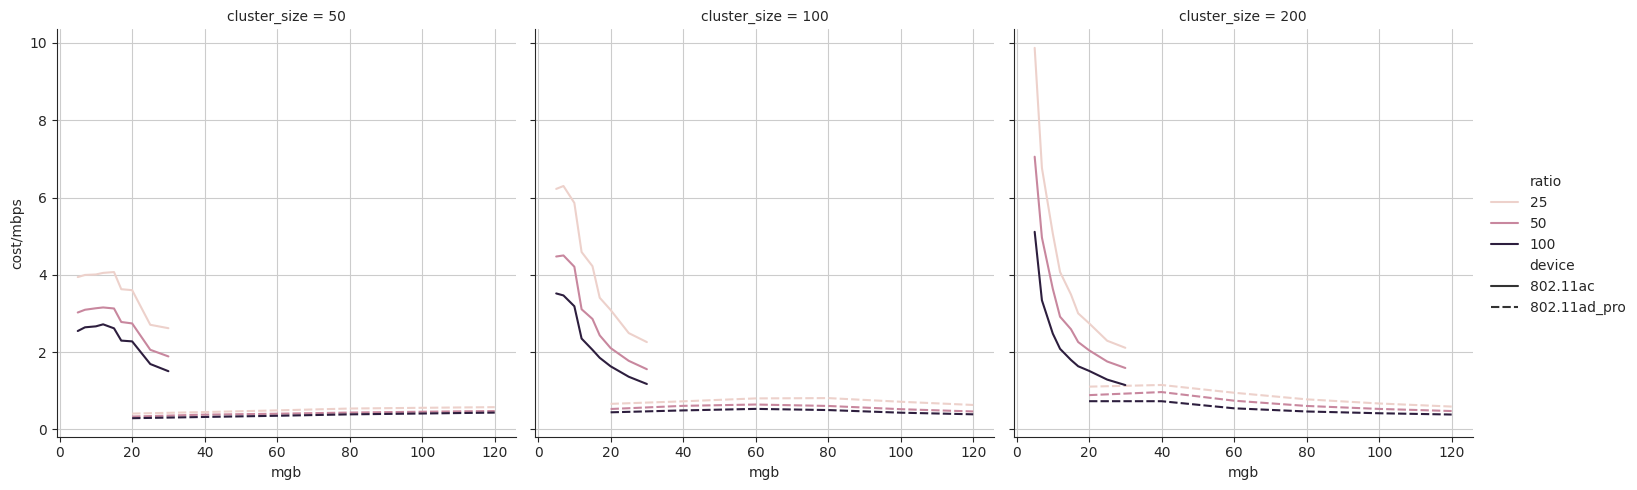

In [38]:
cost_mbps = (costs_df['sum']/bw_df[bw_df.bw_type=='min'].bw).to_frame(name="cost/mbps")
cost_mbps.reset_index(inplace=True)
sns.relplot(data=cost_mbps, x='mgb', hue='ratio', kind='line', style='device', y='cost/mbps', col='cluster_size',)
sns.set_style("ticks",{'axes.grid' : True})


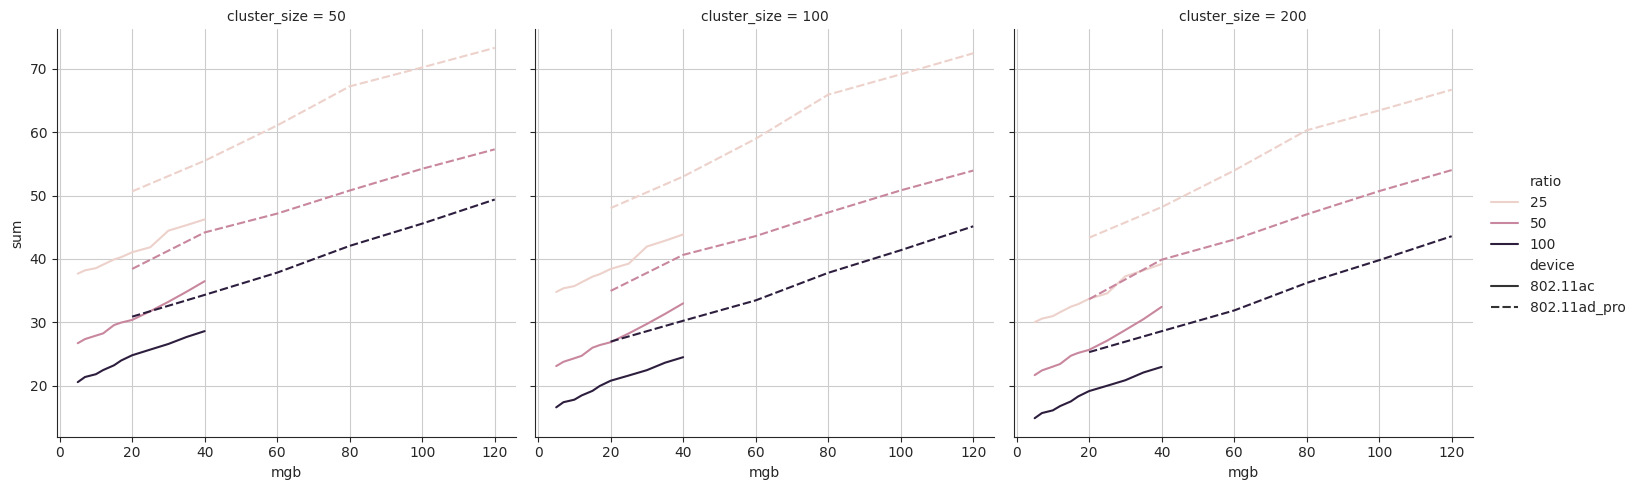

In [45]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
sns.relplot(data=costs_df[costs_df.cluster_size>=50], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")


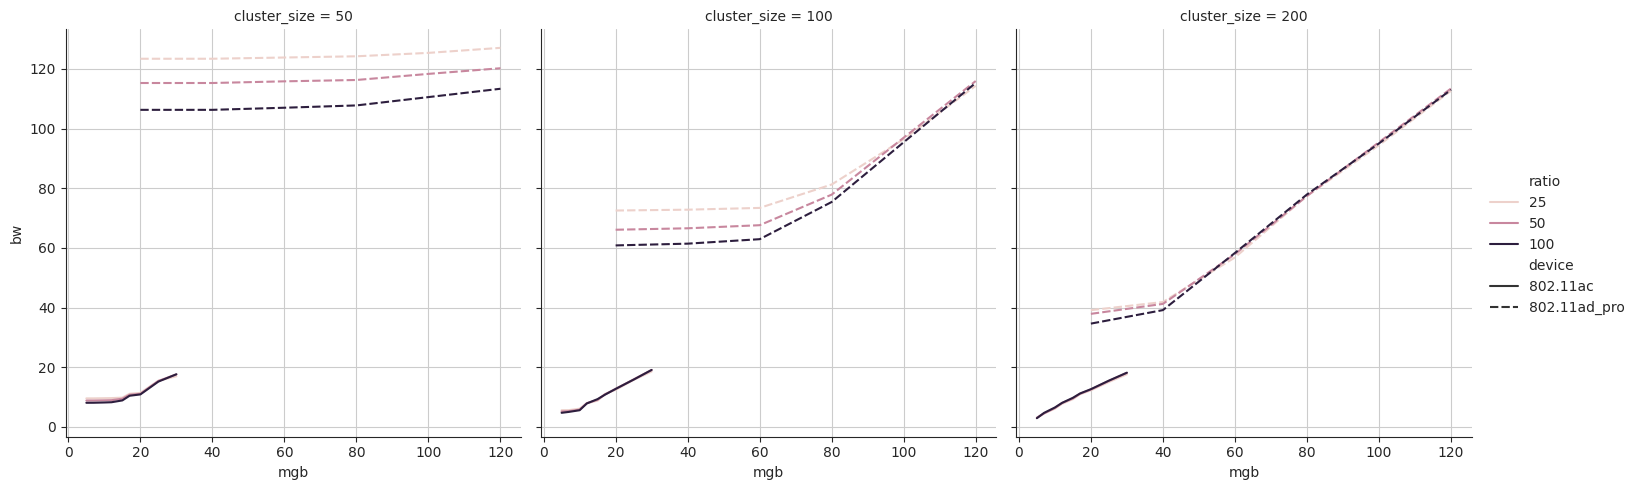

In [47]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=bw_df[bw_df.bw_type=='min'], x='mgb', hue='ratio', kind='line', col='cluster_size', style='device', y='bw', facet_kws={'sharey': True, 'sharex': True})


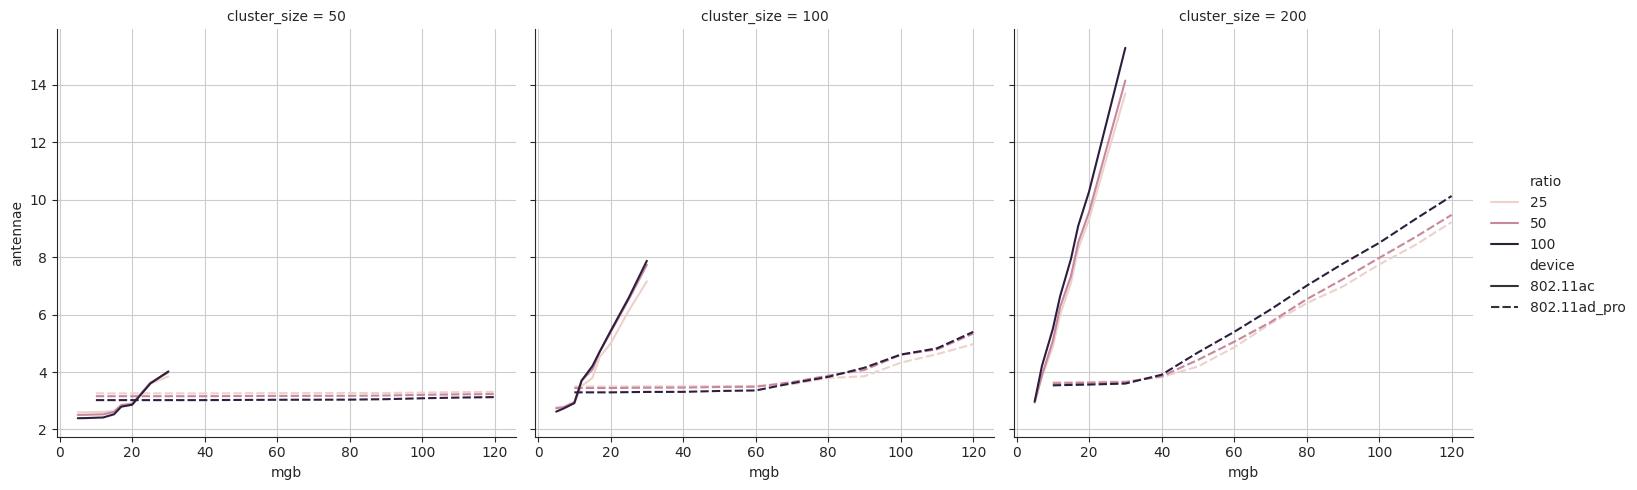

In [48]:
sns.set_style("ticks",{'axes.grid' : True})
sns.relplot(data=n_ant_df[n_ant_df.type=='gw'], x='mgb', hue='ratio', kind='line', col='cluster_size', y='antennae', style='device', facet_kws={'sharey': True, 'sharex': True})

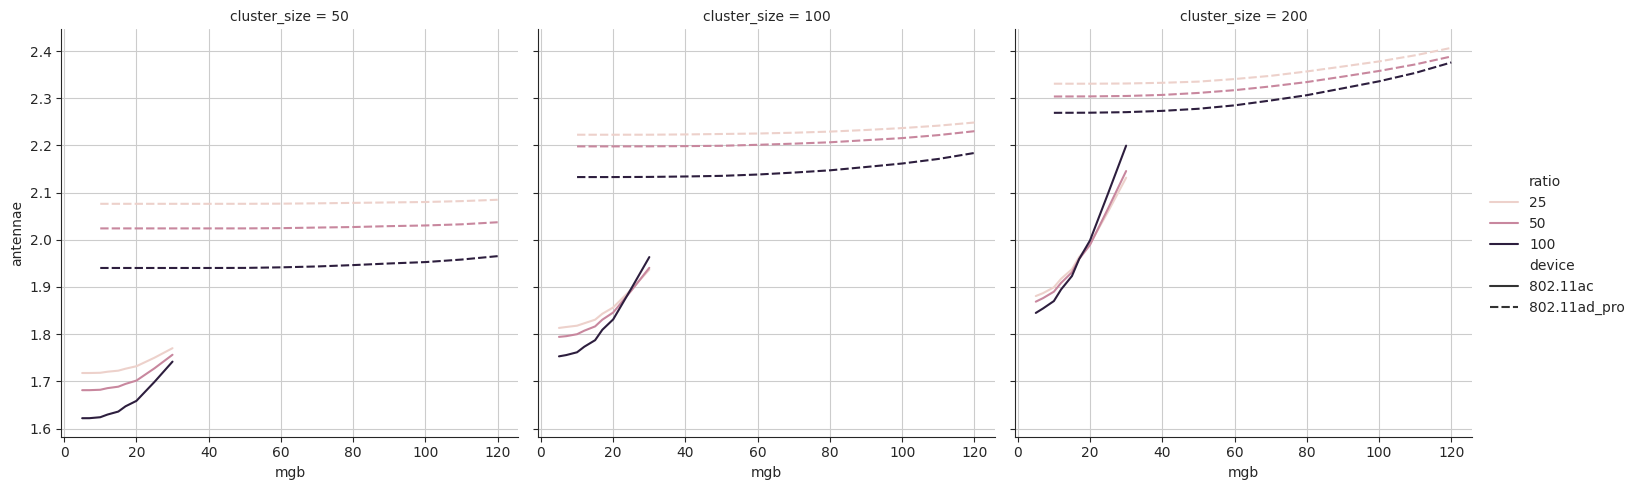

In [49]:
sns.set_style("ticks",{'axes.grid' : True})
sns.relplot(data=n_ant_df[n_ant_df.type=='relay'], x='mgb', hue='ratio', kind='line', col='cluster_size', y='antennae', style='device', facet_kws={'sharey': True, 'sharex': True})